In [28]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [29]:
import re
def my_label(image_name):
    name=re.split('[-.]+',image_name)
    name=name[-3]
    if name in classes:
        return classes.index(name)
    else:
        classes.append(name)
        return classes.index(name)

In [30]:
#importing data
import os
from random import shuffle
from tqdm import tqdm

In [31]:
def my_data():
    data=[]
    for folder in tqdm(os.listdir(r"C:\Users\SULTHAN\Images-1\Images")):
        t_path=os.path.join(r"C:\Users\SULTHAN\Images-1\Images"+"//"+folder)
        for img in tqdm(os.listdir(r"C:\Users\SULTHAN\Images-1\Images"+"//"+folder)):
            path=os.path.join(t_path,img)
            img_data=cv2.imread(path)
            img_data=cv2.resize(img_data,(224,224))
            data.append([np.array(img_data),my_label(img)])
    shuffle(data)
    return data    

In [35]:
data=my_data()

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.36it/s]


In [36]:
classes

['cat', 'dog', 'horse', 'rider']

In [37]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [39]:
x=np.array([a[0] for a in data])
y=np.array([a[1] for a in data])


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

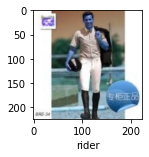

In [42]:
plot_sample(x_train,y_train,2)

In [43]:
#Normalizing the pixels of images
x_train=x_train/255.0
x_test=x_test/255.0

In [48]:
#Artificial networks
ann=models.Sequential([
    layers.Flatten(input_shape=[224,224,3]),
    layers.Dense(30,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [49]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
21/21 [==============================] - 2s 47ms/step - loss: 6.6371 - accuracy: 0.1910
Epoch 2/10
21/21 [==============================] - 1s 35ms/step - loss: 2.2474 - accuracy: 0.2321
Epoch 3/10
21/21 [==============================] - 1s 31ms/step - loss: 2.1961 - accuracy: 0.2546
Epoch 4/10
21/21 [==============================] - 1s 32ms/step - loss: 2.1473 - accuracy: 0.2671
Epoch 5/10
21/21 [==============================] - 1s 32ms/step - loss: 2.1036 - accuracy: 0.2476
Epoch 6/10
21/21 [==============================] - 1s 32ms/step - loss: 2.0578 - accuracy: 0.2735
Epoch 7/10
21/21 [==============================] - 1s 31ms/step - loss: 2.0189 - accuracy: 0.2505
Epoch 8/10
21/21 [==============================] - 1s 31ms/step - loss: 1.9780 - accuracy: 0.2658
Epoch 9/10
21/21 [==============================] - 1s 31ms/step - loss: 1.9362 - accuracy: 0.2803
Epoch 10/10
21/21 [==============================] - 1s 30ms/step - loss: 1.9042 - accuracy: 0.2670


In [47]:
ann.evaluate(x_test,y_test)

6/6 [==============================] - 3s 23ms/step - loss: 2.6363 - accuracy: 0.0000e+00


[2.6092774868011475, 0.0]

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        43
           3       0.23      1.00      0.38        38

    accuracy                           0.23       162
   macro avg       0.06      0.25      0.10       162
weighted avg       0.06      0.23      0.09       162



c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Applying SVM

In [51]:
x= x.reshape(len(x),-1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [52]:
from sklearn import svm
svm = svm.SVC(kernel='rbf', probability=True, random_state=42)

# fit model
svm.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [53]:
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.49      0.45        41
           1       0.31      0.30      0.30        40
           2       0.73      0.77      0.75        39
           3       0.71      0.60      0.65        42

    accuracy                           0.54       162
   macro avg       0.54      0.54      0.54       162
weighted avg       0.55      0.54      0.54       162



In [54]:
from sklearn import svm
svm = svm.SVC(kernel='poly', probability=True, random_state=42)

# fit model
svm.fit(x_train, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [55]:
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.61      0.52        41
           1       0.32      0.30      0.31        40
           2       0.72      0.74      0.73        39
           3       0.80      0.57      0.67        42

    accuracy                           0.56       162
   macro avg       0.58      0.56      0.56       162
weighted avg       0.58      0.56      0.56       162

